In [ ]:
import os
import shutil

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DeepLabV3Plus-Pytorch

/content/drive/MyDrive/DeepLabV3Plus-Pytorch



Batch 0 Results:


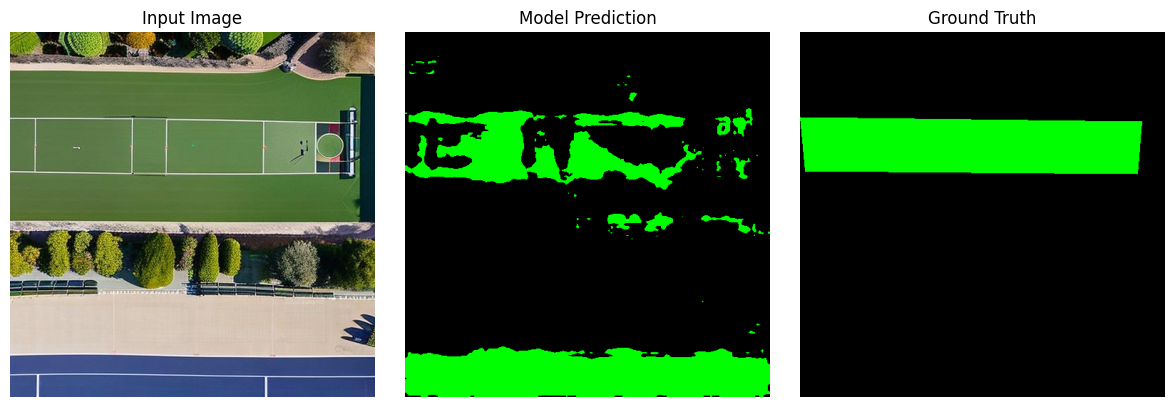


Batch 1 Results:


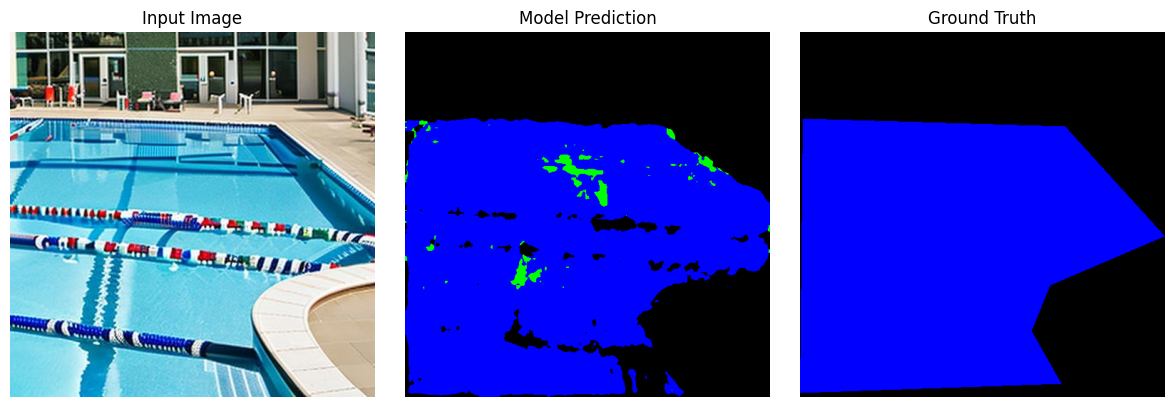


Batch 2 Results:


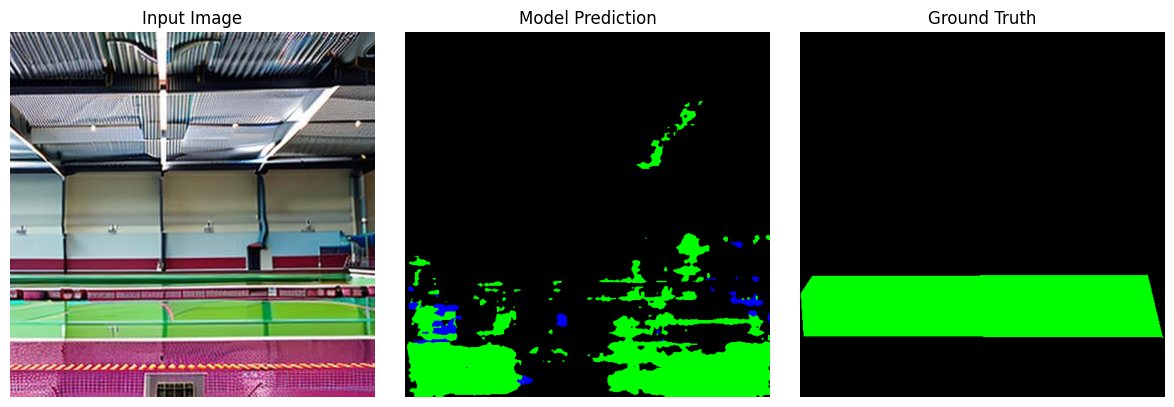

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_prediction_comparison(batch_num):
    base_dir = '/content/drive/MyDrive/validation_results'

    try:
        # Load images
        input_img = Image.open(f'{base_dir}/input_image_batch_{batch_num}.png')
        pred = Image.open(f'{base_dir}/prediction_batch_{batch_num}.png')
        ground_truth = Image.open(f'{base_dir}/ground_truth_batch_{batch_num}.png')

        # Display comparison
        plt.figure(figsize=(12, 4))
        plt.subplot(131)
        plt.imshow(input_img)
        plt.title('Input Image')
        plt.axis('off')

        plt.subplot(132)
        plt.imshow(pred)
        plt.title('Model Prediction')
        plt.axis('off')

        plt.subplot(133)
        plt.imshow(ground_truth)
        plt.title('Ground Truth')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error loading images: {e}")
        print(f"Please check if the images exist in {base_dir}")

# Call the function for a few samples
for batch_num in range(3):
    print(f"\nBatch {batch_num} Results:")
    show_prediction_comparison(batch_num)

In [ ]:
!pip install visdom

In [ ]:
!python main.py --config config.py --total_itrs 125


Starting training with configuration: experiment1_lr=0.01
Device: cpu
Download flag value: False
Dataset: voc, Train set: 160, Val set: 20

Training Configuration:
Max iterations: 125
Learning rate: 0.01
Batch size: 8

Epoch 1
Training epoch 1:  45% 9/20 [02:35<03:09, 17.20s/it]Iteration 10/125, Loss: 0.5036
Training epoch 1:  95% 19/20 [05:10<00:14, 14.85s/it]Iteration 20/125, Loss: 0.4254
Training epoch 1: 100% 20/20 [05:25<00:00, 16.27s/it]

Epoch 1 completed. Average Loss: 0.6663

Epoch 2
Training epoch 2:  20% 4/20 [01:09<04:28, 16.77s/it]
Performing validation...

0it [00:00, ?it/s]
Processing batch 0:
Saved images for batch 0 in /content/drive/MyDrive/validation_results

1it [00:02,  2.73s/it]
Processing batch 1:
Saved images for batch 1 in /content/drive/MyDrive/validation_results

2it [00:03,  1.81s/it]
Processing batch 2:
Saved images for batch 2 in /content/drive/MyDrive/validation_results

3it [00:05,  1.55s/it]
Processing batch 3:
Saved images for batch 3 in /content/driv

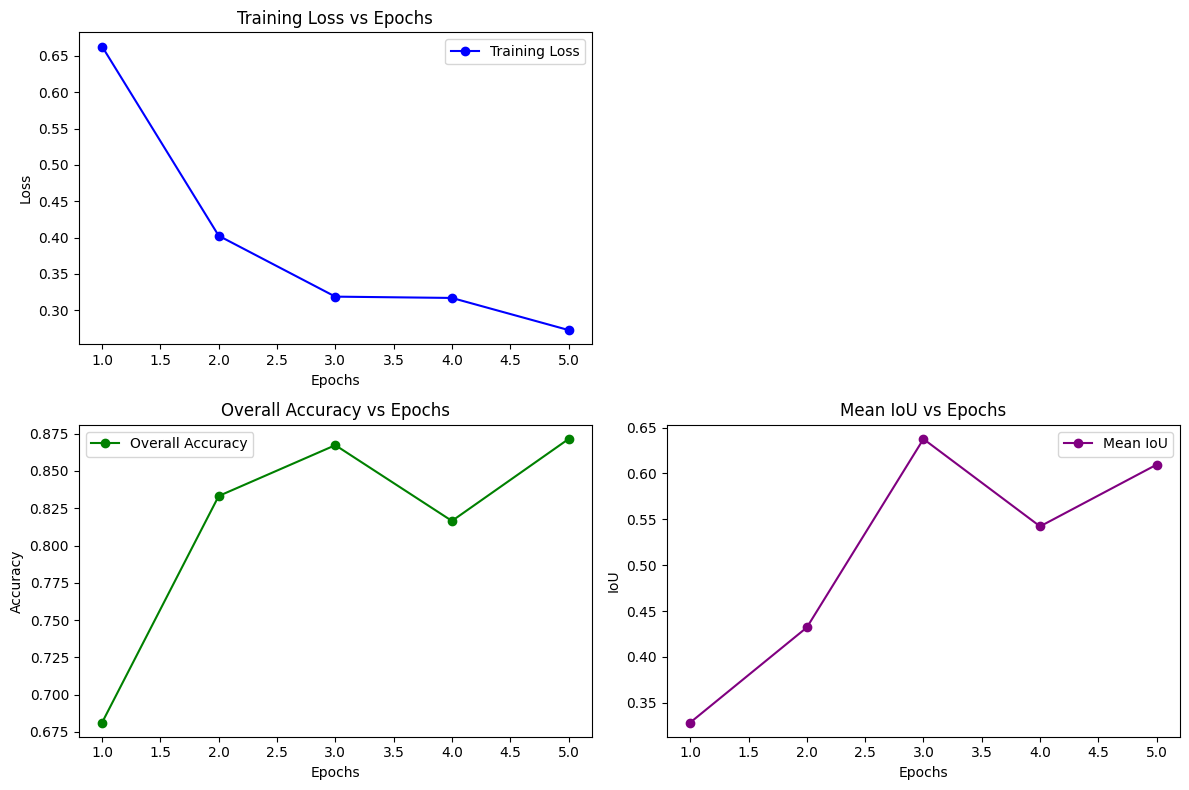

In [ ]:
import matplotlib.pyplot as plt

# Data from the table
epochs = [1, 2, 3, 4, 5]
learning_rate = 0.01
training_loss = [0.6630, 0.4024, 0.3186, 0.3168, 0.2726]
validation_loss = [0.8363, 0.4854, 0.3695, 0.4491, 0.3198]
overall_accuracy = [0.681269, 0.833215, 0.867305, 0.816495, 0.871439]
mean_iou = [0.328385, 0.432084, 0.637598, 0.542321, 0.609661]

# Create subplots
plt.figure(figsize=(12, 8))

# Plot Training Loss
plt.subplot(2, 2, 1)
plt.plot(epochs, training_loss, marker='o', label='Training Loss', color='blue')
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Overall Accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, overall_accuracy, marker='o', label='Overall Accuracy', color='green')
plt.title('Overall Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

# Plot Mean IoU
plt.subplot(2, 2, 4)
plt.plot(epochs, mean_iou, marker='o', label='Mean IoU', color='purple')
plt.title('Mean IoU vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
